In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_path = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeetUpdated.csv"
data = pd.read_csv(data_path)

Exracting Google Meet Total call minutes 30 day Active Users related metrics

In [2]:
Actusers = data[["google.meet:num_30day_active_users","time","date","year","month"]].rename(columns = {"google.meet:num_30day_active_users": "ActiveUsers"}) 
Actusers.head(10)

,ActiveUsers,time,date,year,month
0,0.0,2018-01-14T00:00:00.000-0500,2018-01-14,2018,1
1,0.0,2018-01-15T00:00:00.000-0500,2018-01-15,2018,1
2,0.0,2018-01-16T00:00:00.000-0500,2018-01-16,2018,1
3,0.0,2018-01-17T00:00:00.000-0500,2018-01-17,2018,1
4,0.0,2018-01-18T00:00:00.000-0500,2018-01-18,2018,1
5,0.0,2018-01-19T00:00:00.000-0500,2018-01-19,2018,1
6,0.0,2018-01-20T00:00:00.000-0500,2018-01-20,2018,1
7,0.0,2018-01-21T00:00:00.000-0500,2018-01-21,2018,1
8,0.0,2018-01-22T00:00:00.000-0500,2018-01-22,2018,1
9,0.0,2018-01-23T00:00:00.000-0500,2018-01-23,2018,1


Shape Of Data

In [3]:
Actusers.shape

(543, 5)

Value counts is used to find the number of observations with metric value as 0,1,..
There are 98 observations with metric value as 0

In [4]:
counts = Actusers.ActiveUsers.value_counts()
counts.head(10)

0.0      98
1.0      28
471.0     5
465.0     5
452.0     4
469.0     4
435.0     4
467.0     4
218.0     4
222.0     4
Name: ActiveUsers, dtype: int64

Finding number of negative metric_values using mask. There are no negative values

In [5]:
mask = (Actusers.ActiveUsers< 0)
Actusers[mask].head()

,ActiveUsers,time,date,year,month


Sorting using metric values in ascending order.

In [6]:
Actusers.ActiveUsers.sort_values().head(10)

0     0.0
72    0.0
71    0.0
70    0.0
69    0.0
67    0.0
66    0.0
65    0.0
64    0.0
63    0.0
Name: ActiveUsers, dtype: float64

describe is used to get some useful information like number of metric values and least, highest metric value

In [7]:
Actusers.ActiveUsers.describe()

count    538.000000
mean     305.947955
std      215.882109
min        0.000000
25%       65.000000
50%      378.000000
75%      481.000000
max      646.000000
Name: ActiveUsers, dtype: float64

Maximum number of 30 day active users in data frame

In [8]:
Actusers.loc[Actusers.ActiveUsers.idxmax()]

ActiveUsers                             646
time           2019-04-16T00:00:00.000-0400
date                             2019-04-16
year                                   2019
month                                     4
Name: 432, dtype: object

Minimun value in dataframe

In [9]:
Actusers.loc[Actusers.ActiveUsers.idxmin()]

ActiveUsers                               0
time           2018-01-14T00:00:00.000-0500
date                             2018-01-14
year                                   2018
month                                     1
Name: 0, dtype: object

In [13]:
Actusers.groupby(['ActiveUsers', 'date' , 'time' , 'year','month']).count().tail(10)

Empty DataFrame
Columns: []
Index: [(631.0, 2019-04-08, 2019-04-08T00:00:00.000-0400, 2019, 4), (634.0, 2019-04-15, 2019-04-15T00:00:00.000-0400, 2019, 4), (637.0, 2019-04-12, 2019-04-12T00:00:00.000-0400, 2019, 4), (638.0, 2019-04-09, 2019-04-09T00:00:00.000-0400, 2019, 4), (638.0, 2019-04-10, 2019-04-10T00:00:00.000-0400, 2019, 4), (640.0, 2019-04-04, 2019-04-04T00:00:00.000-0400, 2019, 4), (640.0, 2019-04-05, 2019-04-05T00:00:00.000-0400, 2019, 4), (640.0, 2019-04-17, 2019-04-17T00:00:00.000-0400, 2019, 4), (643.0, 2019-04-18, 2019-04-18T00:00:00.000-0400, 2019, 4), (646.0, 2019-04-16, 2019-04-16T00:00:00.000-0400, 2019, 4)]

Number of observations for each year

In [14]:
Actusers.year.value_counts()

2018    328
2019    215
Name: year, dtype: int64

Number of observations for each month

In [15]:
Actusers.month.value_counts()

4     60
3     60
6     54
5     54
2     53
7     51
1     49
8     41
12    31
10    31
11    30
9     29
Name: month, dtype: int64

In [16]:
Actusers['ActiveUsers'].quantile(0)

0.0

Median of metric values

In [17]:
Actusers['ActiveUsers'].quantile(0.5)

378.0

Highest Metric values are around 646 in the month of April

In [18]:
Actusers['ActiveUsers'].quantile(1.0)

646.0

Mean value is lower than median as we have extreme values in the lower end

In [19]:
Actusers['ActiveUsers'].mean()

305.9479553903346

Mode of metric values. number of 30 day active users count is zero for most of the days

In [20]:
Actusers['ActiveUsers'].mode()

0    0.0
dtype: float64

Quartile

minimum value (0th percentile),
first quartile (25th percentile),
the median - second quartile (50th percentile),
third quartile(75th percentile), and
maximum value (100th percentile)
using the quantile() function:

In [21]:
five_num = [Actusers['ActiveUsers'].quantile(0),   
            Actusers['ActiveUsers'].quantile(0.25),
            Actusers['ActiveUsers'].quantile(0.50),
            Actusers['ActiveUsers'].quantile(0.75),
            Actusers['ActiveUsers'].quantile(1)]

five_num

[0.0, 65.0, 378.0, 481.0, 646.0]

Interquartile (IQR) range - distance between the 3rd quartile and the 1st quartile

In [22]:
Actusers['ActiveUsers'].quantile(0.75) - Actusers['ActiveUsers'].quantile(0.25)

416.0

Box Plots based on year

We can see there are minimum outliers in Year 2019

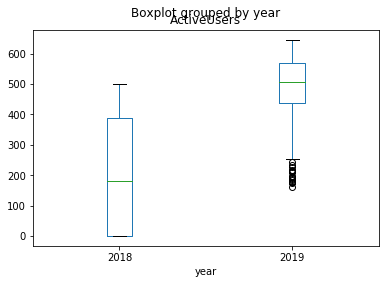

In [23]:
Actusers.boxplot(by ='year', column =['ActiveUsers'], grid = False) 

In [24]:
Actusers['ActiveUsers'].var()

46605.08480959212

Standard Deviation - square root of the variance.

In [25]:
Actusers['ActiveUsers'].std()

215.88210859075866

Variance and Standard Deviation are not the right measures of spread as our data is having minimum outlier values. So, they are susceptible to the influence of data skew and outliers as both of them are derived from the mean.

Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median

Median absolute deviation is the right measure of spread for Number of 30 day Active Users metric

In [27]:
abs_median_devs = abs(Actusers['ActiveUsers']- Actusers['ActiveUsers'].median())

abs_median_devs.median() * 1.4826

243.1464